In [1]:
import numpy as np
import pandas as pd

In [2]:
X = pd.read_csv('data/intermediate_results.csv')

In [3]:
y = X['worldwide_gross']

In [4]:
X = X.drop('worldwide_gross', axis=1)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [6]:
print(len(X))
print(len(X_train))
print(len(X_test))

4104
2462
1642


In [7]:
X.head(1)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,760505847.0


In [8]:
from sklearn.linear_model import Lasso

model = Lasso()

In [9]:
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
predicted = model.predict(X_test)

In [11]:
predicted.shape

(1642,)

([array([  1.58500000e+03,   5.20000000e+01,   1.00000000e+00,
           2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           1.00000000e+00]),
  array([  1.58400000e+03,   4.90000000e+01,   6.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00])],
 array([ -4.32162510e+07,   5.11588189e+08,   1.06639263e+09,
          1.62119707e+09,   2.17600151e+09,   2.73080595e+09,
          3.28561039e+09,   3.84041483e+09,   4.39521927e+09,
          4.95002371e+09,   5.50482815e+09]),
 <a list of 2 Lists of Patches objects>)

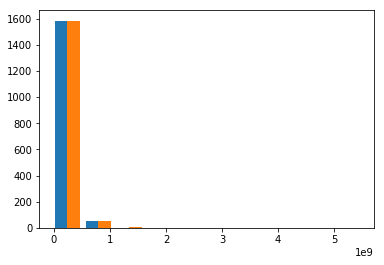

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.hist(predicted)
plt.hist([predicted, y_test])

In [13]:
model.score(X_test, y_test)

0.67667902950980541

In [14]:
residuals = y_test - predicted

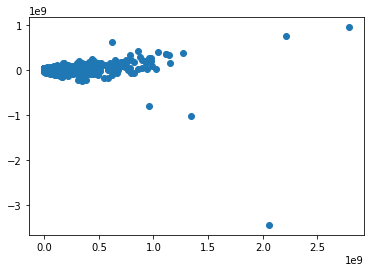

In [15]:
plt.scatter(y_test, residuals)

In [16]:
ap_residuals = np.abs(residuals) / y_test

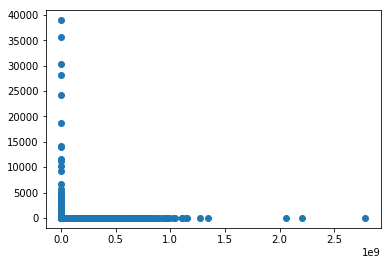

In [17]:
plt.scatter(y_test, ap_residuals)

In [18]:
lap_residuals = np.log(ap_residuals)

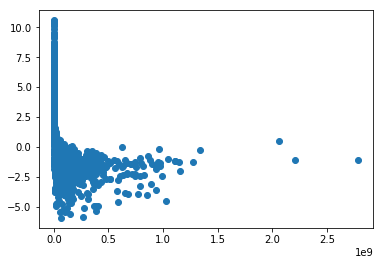

In [19]:
plt.scatter(y_test, lap_residuals)

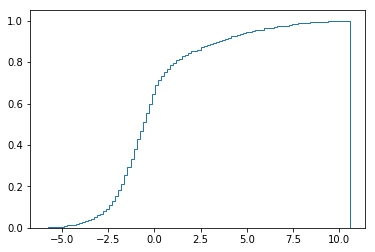

In [21]:
plt.hist(lap_residuals, bins=100, normed=1, histtype='step', cumulative=True);

array([ 0.13533528,  0.22313016,  0.36787944,  0.60653066,  1.        ])

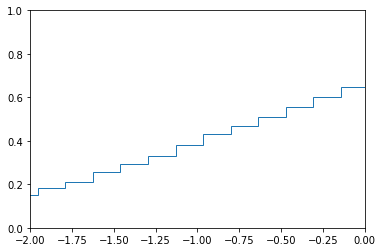

In [24]:
plt.hist(lap_residuals, bins=100, normed=1, histtype='step', cumulative=True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5), np.linspace(-2, 0, 5))